In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as ksl
from keras.datasets import mnist
import numpy as np 

In [38]:
def BModel(metrics=None,loss='categorical_crossentropy',optimizer='adam'):    
    
    model = tf.keras.models.Sequential()
    model.add(ksl.Conv2D(128, kernel_size=3, strides=2,padding='same'))
    model.add(ksl.BatchNormalization())
    model.add(ksl.Dropout(0.1))
    model.add(ksl.LeakyReLU(alpha=0.1))
    
    model.add(ksl.Conv2D(64, kernel_size=3, strides=2,padding='same'))
    model.add(ksl.BatchNormalization())
    model.add(ksl.Dropout(0.05))
    model.add(ksl.LeakyReLU(alpha=0.1))
    
    model.add(ksl.Conv2D(64, kernel_size=3, padding='same'))
    model.add(ksl.LeakyReLU(alpha=0.1))
    model.add(ksl.Flatten())
    model.add(ksl.Dense(10,activation='softmax'))
    
    model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    
    return model

In [39]:
def trainModel(model,image,target,valspl=0.2
               ,epochs=10,callbacks=None,BatchSize=128):
    image = np.array(image)
    target = np.array(target)
    
    image = image/image.max()
    NCL = len(np.unique(target))
    target = tf.keras.utils.to_categorical(target,num_classes=NCL)
    image = np.expand_dims(image,axis=3)
    

    Hist = model.fit(image,target,epochs=epochs,batch_size=BatchSize,
                     callbacks=callbacks,validation_split=valspl)
    return Hist

In [40]:
def Evaluate(x,y,model):
  image = np.array(x)
  target = np.array(y)
  
  image = image/image.max()
  NCL = len(np.unique(target))
  target = tf.keras.utils.to_categorical(target,num_classes=NCL)
  image = np.expand_dims(image,axis=3)

  score = model.evaluate(image,target)
  predict = model.predict(x)

  return score,predict

In [41]:
def SaveModel(model):
    model.save('model')

In [53]:
(xTrain,yTrain),(xTest,yTest) = mnist.load_data()
model = BModel() 
Hist = trainModel(model,xTrain,yTrain,epochs=2,BatchSize=20)
(score,p)= Evaluate(xTest,yTest,model)
print('loss:', score)

Epoch 1/2
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1396 - val_loss: 0.0670
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0532
loss: 0.05320601165294647


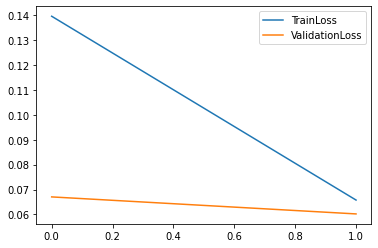

In [54]:
plt.plot(Hist.epoch,Hist.history['loss'])
plt.plot(Hist.epoch,Hist.history['val_loss'])
plt.legend(['TrainLoss','ValidationLoss'])

predict:  7


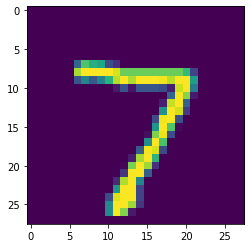

In [55]:
plt.imshow(xTest[0])
print('predict: ',np.argmax(p[0]))



predict:  2


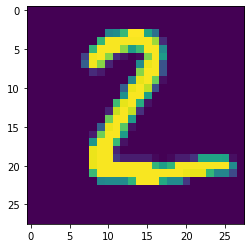

In [52]:
plt.imshow(xTest[1])
print('predict: ',np.argmax(p[1]))